In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting pmf and cdf for Rolling a die 10000 times

pmf table :-
\begin{array}{c|cccccc}
\text{Outcome } (x) & 1 & 2 & 3 & 4 & 5 & 6 \\ \hline
P(X = x) & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6}
\end{array}



In [ ]:
# Generating 10,000 random outcomes of die roll
import random
L = []
for i in range(10000):
  a = random.randint(1, 6)
  L.append(a)

len(L)

10000

In [ ]:
# Generate PMF table
s = (pd.Series(L).value_counts() / pd.Series(L).value_counts().sum()).sort_index()
s

,count
1,0.1665
2,0.1650
3,0.1685
4,0.1712
5,0.1672
6,0.1616


<Axes: ylabel='count'>

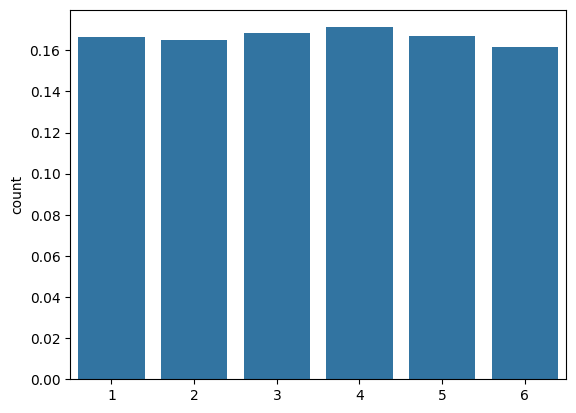

In [ ]:
# Plot pmf
sns.barplot(s)

In [ ]:
# CDF table
np.cumsum(s)

,count
1,0.1665
2,0.3315
3,0.5000
4,0.6712
5,0.8384
6,1.0000


<Axes: ylabel='count'>

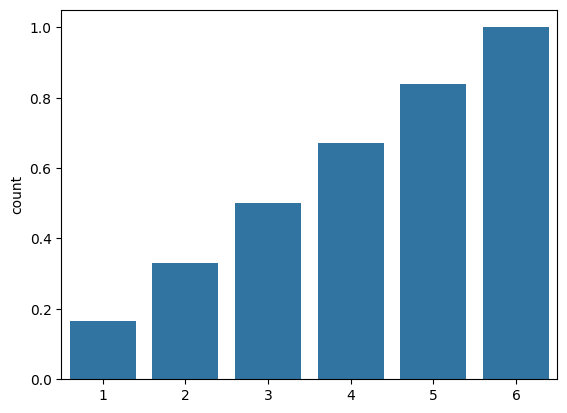

In [ ]:
# plot CDF
sns.barplot(np.cumsum(s))

# Plotting pmf and cdf for sum of numbers obtianed from rolling 2 die 10000 times
pmf table :-

\begin{array}{c|ccccccccccc}
\text{Sum } (x) & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 \\ \hline
P(X = x)
& \frac{1}{36}
& \frac{2}{36}
& \frac{3}{36}
& \frac{4}{36}
& \frac{5}{36}
& \frac{6}{36}
& \frac{5}{36}
& \frac{4}{36}
& \frac{3}{36}
& \frac{2}{36}
& \frac{1}{36}
\end{array}



In [ ]:
# Generating 10,000 random outcomes of 2 die rolls
L = []
for i in range(10000):
  a = random.randint(1, 6)
  b = random.randint(1, 6)
  L.append(a+b)

len(L)

10000

In [ ]:
# Generate PMF table
s = (pd.Series(L).value_counts() / pd.Series(L).value_counts().sum()).sort_index()
s

,count
2,0.0270
3,0.0586
4,0.0814
5,0.1164
6,0.1379
7,0.1592
8,0.1398
9,0.1161
10,0.0848
11,0.0511


<Axes: ylabel='count'>

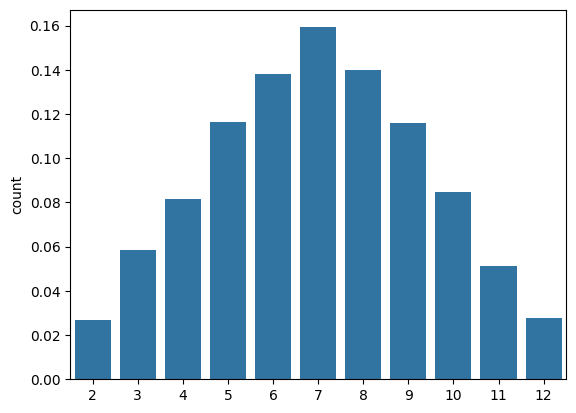

In [ ]:
# Plot pmf
sns.barplot(s)

In [ ]:
# CDF table
np.cumsum(s)

,count
2,0.0270
3,0.0856
4,0.1670
5,0.2834
6,0.4213
7,0.5805
8,0.7203
9,0.8364
10,0.9212
11,0.9723


<Axes: ylabel='count'>

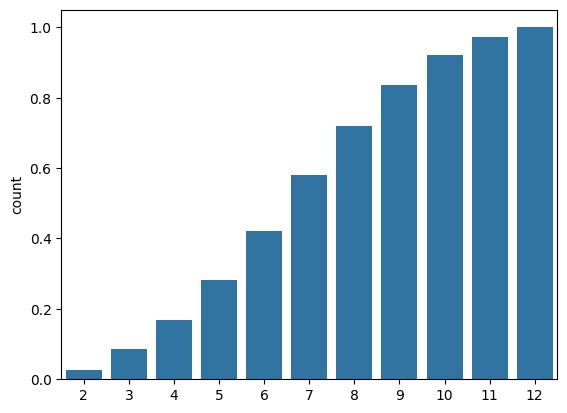

In [ ]:
# plot CDF
sns.barplot(np.cumsum(s))

# Parametric Density Estimation

In [ ]:
# Creating a sample normal distribution of 1000 values with mean=50 and var=5
from numpy.random import normal
sample = normal(loc=50, scale=5, size=1000)

In [ ]:
sample.mean()

np.float64(50.10228252508901)

In [ ]:
sample.std()

np.float64(4.9479976369002525)

(array([  2.,  13.,  60., 166., 286., 237., 164.,  52.,  17.,   3.]),
 array([32.49484237, 36.04615395, 39.59746553, 43.14877711, 46.70008869,
        50.25140027, 53.80271184, 57.35402342, 60.905335  , 64.45664658,
        68.00795816]),
 <BarContainer object of 10 artists>)

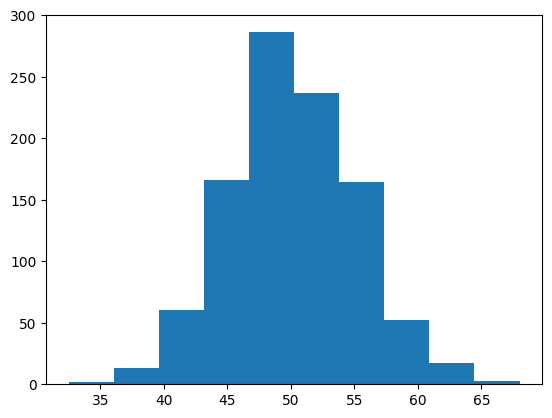

In [ ]:
# plot histogram to understand the distribution of data
plt.hist(sample, bins=10)

In [ ]:
# Calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [ ]:
# fit the distribution with the above parameters
from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [ ]:
# Generate 100 random evenly spaced numbers from sample
values = np.linspace(min(sample), max(sample), 100)

In [ ]:
# Calculating probabilities
probabilities = [dist.pdf(value) for value in values]

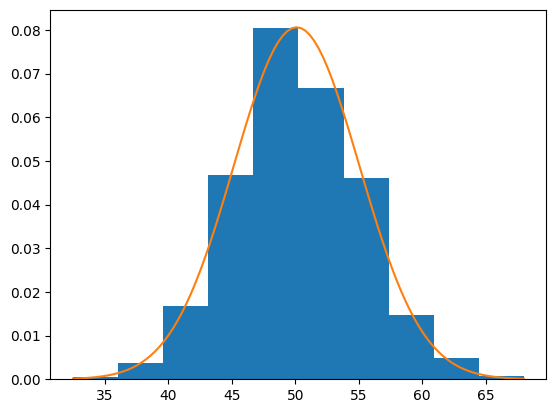

In [ ]:
# Plotting the curve
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)

<Axes: ylabel='Count'>

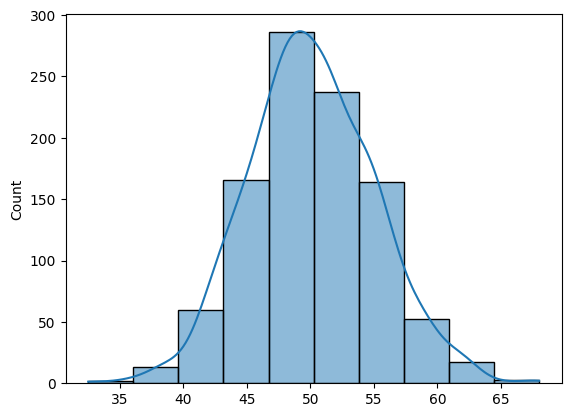

In [ ]:
sns.histplot(sample, kde=True, bins=10)

# Non Parametric Density Estimation using KDE

In [ ]:
# Generating a sample distribution by combining 2 normal distributions
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

(array([ 1.,  1.,  1.,  5., 10., 10., 23., 30., 40., 26., 46., 35., 36.,
        18., 13., 16., 23., 37., 44., 65., 67., 93., 98., 88., 65., 52.,
        27., 14.,  8.,  8.]),
 array([ 3.53399625,  5.18440849,  6.83482073,  8.48523296, 10.1356452 ,
        11.78605744, 13.43646968, 15.08688192, 16.73729416, 18.3877064 ,
        20.03811863, 21.68853087, 23.33894311, 24.98935535, 26.63976759,
        28.29017983, 29.94059206, 31.5910043 , 33.24141654, 34.89182878,
        36.54224102, 38.19265326, 39.8430655 , 41.49347773, 43.14388997,
        44.79430221, 46.44471445, 48.09512669, 49.74553893, 51.39595116,
        53.0463634 ]),
 <BarContainer object of 30 artists>)

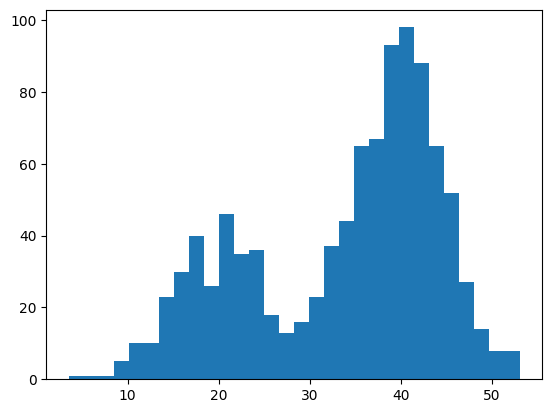

In [ ]:
# plot histogram
plt.hist(sample, bins=30)

In [ ]:
# Fitting guassian kernel on the data
from sklearn.neighbors import KernelDensity

model = KernelDensity(kernel="gaussian", bandwidth=3)

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=3)

In [ ]:
# Generate 100 random evenly spaced numbers from sample
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [ ]:
# Calculating probabilities
# score_samples(values) returns the log-density estimate of the input samples values.
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

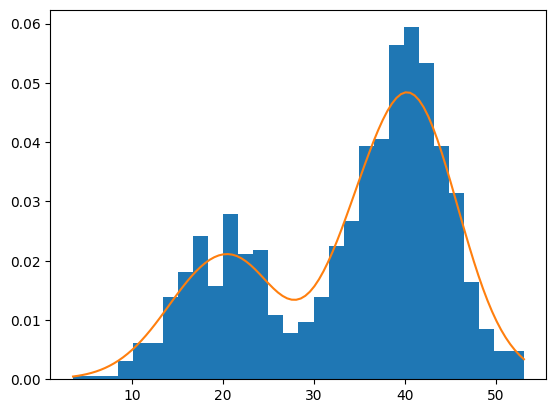

In [ ]:
# Plotting the curve
plt.hist(sample, bins=30, density=True)
plt.plot(values, probabilities)

<Axes: ylabel='Count'>

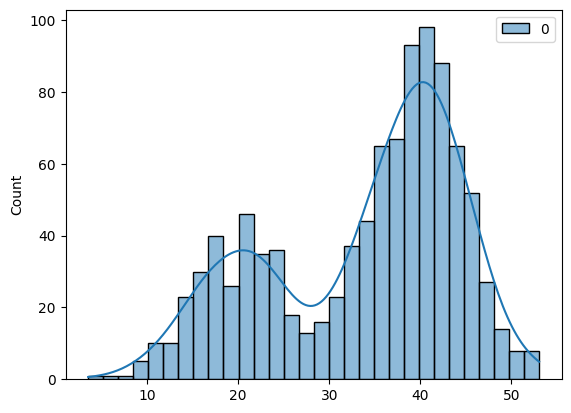

In [ ]:
sns.histplot(sample, kde=True, bins=30)

bw_adjust affects the smoothness of curve, more the bw_adjust more smoother the curve is

<Axes: ylabel='Density'>

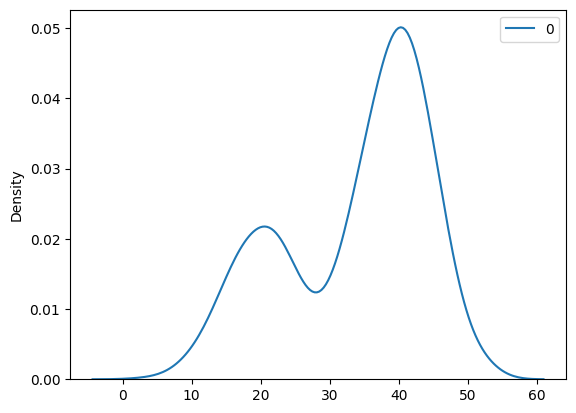

In [ ]:
sns.kdeplot(sample, bw_adjust=1)

<Axes: ylabel='Density'>

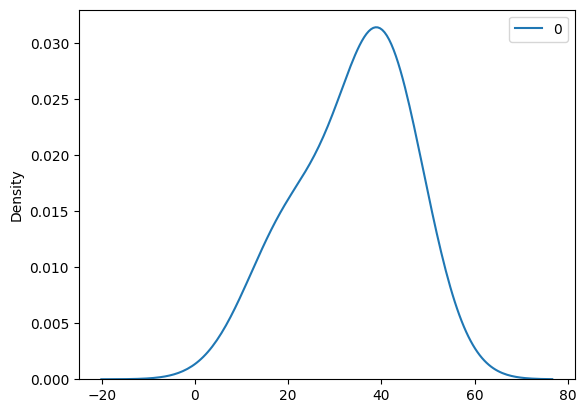

In [ ]:
sns.kdeplot(sample, bw_adjust=3)

<Axes: ylabel='Density'>

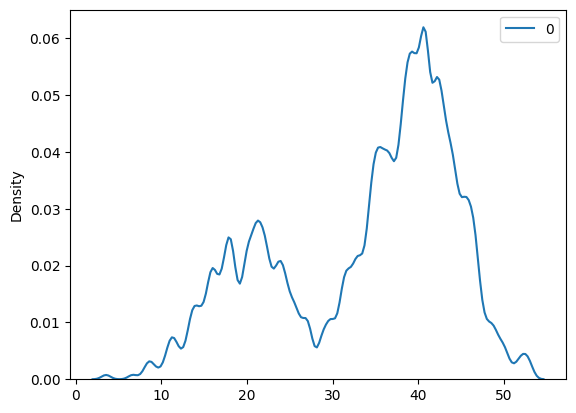

In [ ]:
sns.kdeplot(sample, bw_adjust=0.2)

<Axes: ylabel='Density'>

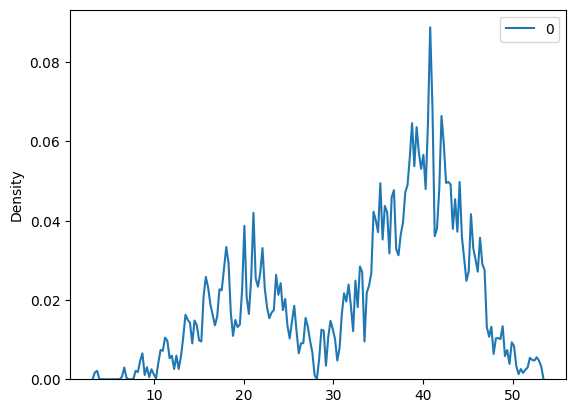

In [ ]:
sns.kdeplot(sample, bw_adjust=0.05)

# Use of PDF in data analysis

In [9]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


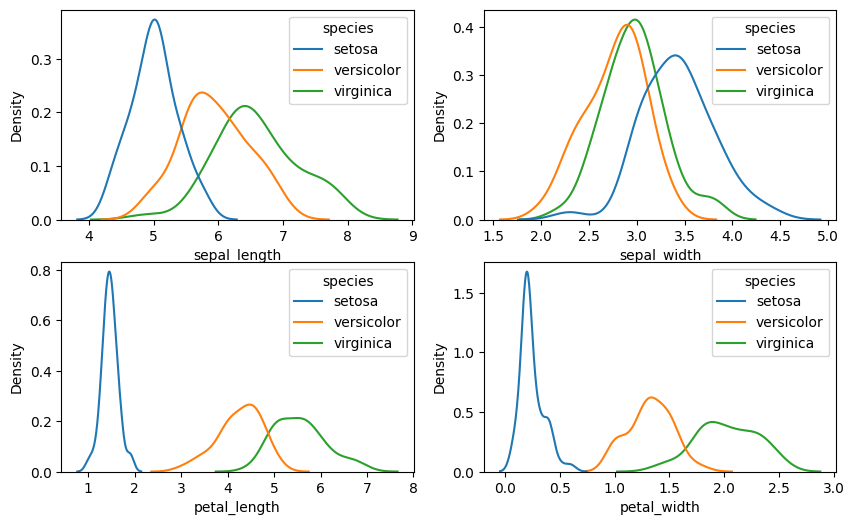

In [ ]:
# Plotting KDE plots for the numerical columns
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.kdeplot(x="sepal_length", data=df, hue='species')

plt.subplot(2, 2, 2)
sns.kdeplot(x="sepal_width", data=df, hue='species')

plt.subplot(2, 2, 3)
sns.kdeplot(x="petal_length", data=df, hue='species')

plt.subplot(2, 2, 4)
sns.kdeplot(x="petal_width", data=df, hue='species')

plt.show()

In the above example petal_length and petal_width separate the classes better than sepal_length and sepal_width, since those distributions have less overlap

# Use of CDF in data analysis

<Axes: xlabel='petal_width', ylabel='Density'>

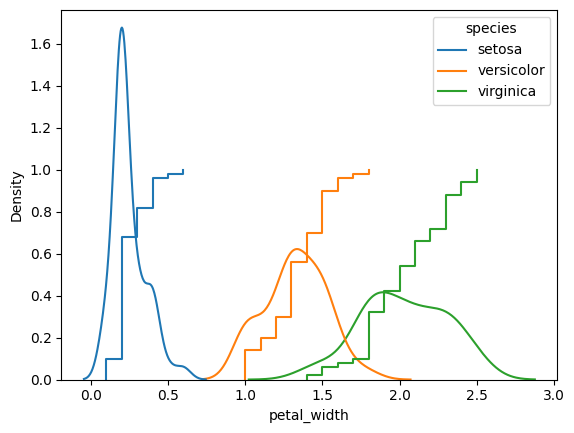

In [ ]:
sns.kdeplot(x="petal_width", data=df, hue='species')
sns.ecdfplot(x="petal_width", data=df, hue='species')

In the above example, the CDF tells the probability of correctly distinguishing between classes
* If petal_width < 0.7 → predict setosa (≈95% of such flowers are setosa)
* If 0.7 ≤ petal_width < 1.7 → predict versicolor (≈95% of such flowers are versicolor)
* If petal_width ≥ 1.7 → predict virginica (≈90% of such flowers are virginica).

# 2D KDE plots

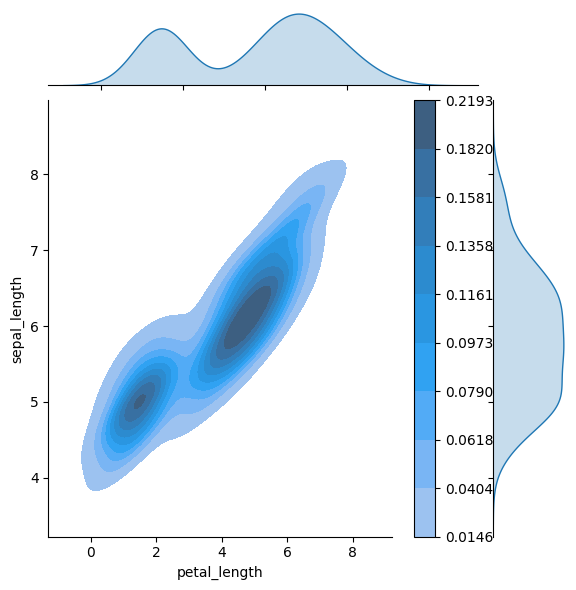

In [ ]:
sns.jointplot(x=df["petal_length"], y=df["sepal_length"], kind="kde", fill=True, cbar=True)

A 2D density plot shows how the joint probability density f(X,Y) is distributed across two features, where darker/stronger regions indicate where combinations of (X,Y) occur most frequently.

# Transforming a normal distribution into standard distribution

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

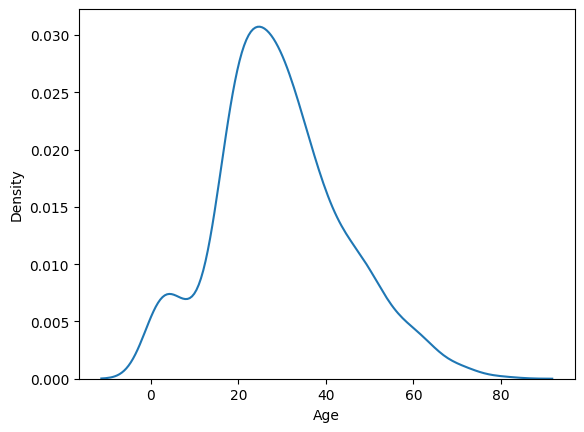

In [ ]:
# kdeplot of age
sns.kdeplot(titanic['Age'])

In [ ]:
titanic["Age"].mean()

np.float64(29.69911764705882)

In [ ]:
titanic["Age"].std()

14.526497332334044

The above distribution is not a standard normal distribution

In [ ]:
# Converting 'Age' into standard normal distribution
x = (titanic["Age"] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

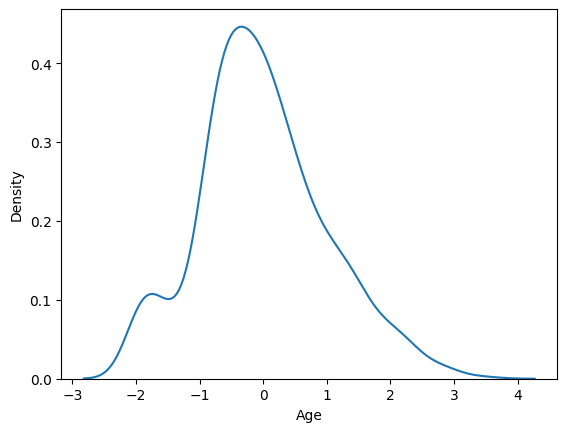

In [ ]:
# Plotting kdeplot
sns.kdeplot(x)

In [ ]:
x.std()

0.9999999999999994

The mean is now close to 0 and std is close to 1

# Handling outliers using standard normal distribution

In [ ]:
titanic["Age"].mean() + 3*titanic["Age"].std()

np.float64(73.27860964406095)

In [ ]:
titanic["Age"].mean() - 3*titanic["Age"].std()

np.float64(-13.88037434994331)

In [ ]:
# Display the outliers
titanic[(titanic['Age'] > 73) | (titanic['Age'] < -13)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


# Skewness

In [ ]:
titanic["Age"].skew()

np.float64(0.38910778230082704)

#Kurtosis

In [5]:
titanic["Age"].kurtosis()

np.float64(0.17827415364210353)

In [4]:
titanic["Age"].kurt()

np.float64(0.17827415364210353)

# QQ plots

## Plotting QQ plot manually

<Axes: xlabel='sepal_length', ylabel='Density'>

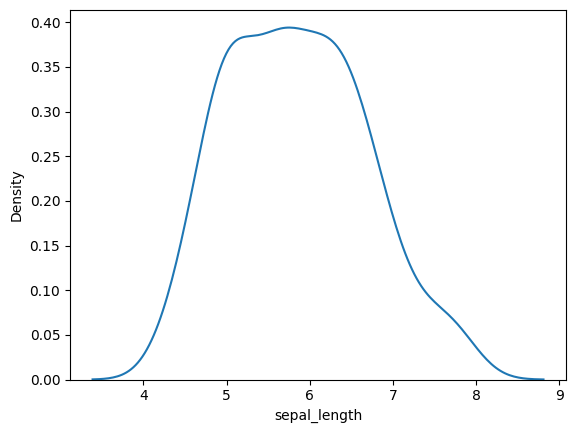

In [10]:
sns.kdeplot(df['sepal_length'])

In [11]:
# Sorting values of sepal_length
temp = sorted(df['sepal_length'].tolist())

In [12]:
# Calculating percentiles from 1 to 100 for above list
y_quant = []
for i in range(1, 101):
  y_quant.append(np.percentile(temp, i))

In [13]:
# Generating theoretical normally distributed data
samples = np.random.normal(loc=0, scale=1, size=1000)

In [14]:
# Calculating percentiles from 1 to 100 for above list
x_quant = []
for i in range(1, 101):
  x_quant.append(np.percentile(samples, i))

<Axes: >

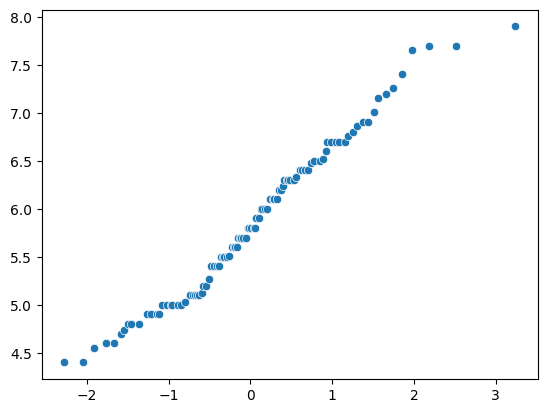

In [15]:
# Plotting scatterplot between y_quant vs x_qaunt
sns.scatterplot(x=x_quant, y=y_quant)

## Plotting QQ plot using statsmodels library

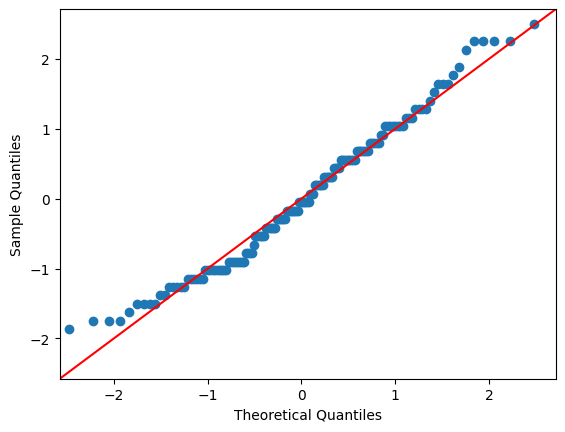

In [19]:
import statsmodels.api as sm
sm.qqplot(df['sepal_length'], line='45', fit=True)
plt.show()

## Using QQ plot to check if a distribution follows a uniform distribution

(array([119.,  97.,  91.,  96.,  96.,  98., 102.,  99.,  93., 109.]),
 array([0.00475177, 0.10405466, 0.20335755, 0.30266045, 0.40196334,
        0.50126623, 0.60056912, 0.69987202, 0.79917491, 0.8984778 ,
        0.9977807 ]),
 <BarContainer object of 10 artists>)

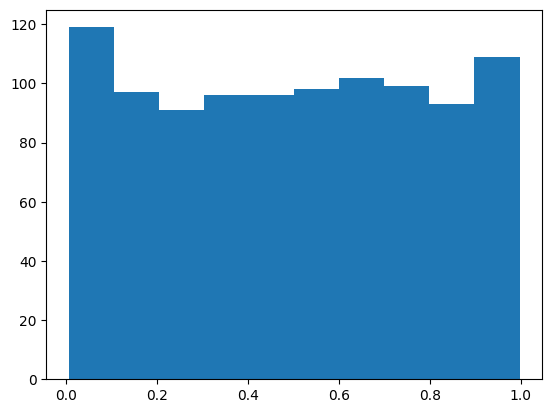

In [20]:
# generating sample uniformly distributed data
x = np.random.uniform(low=0, high=1, size=1000)
plt.hist(x)

In [24]:
# Fitting a uniform distribution to the data
import scipy.stats as stats
params = stats.uniform.fit(x)
params

(0.004751768641471532, 0.9930289265466393)

In [25]:
# Creating sample uniform distribution
dist = stats.uniform(loc=params[0], scale=params[1])

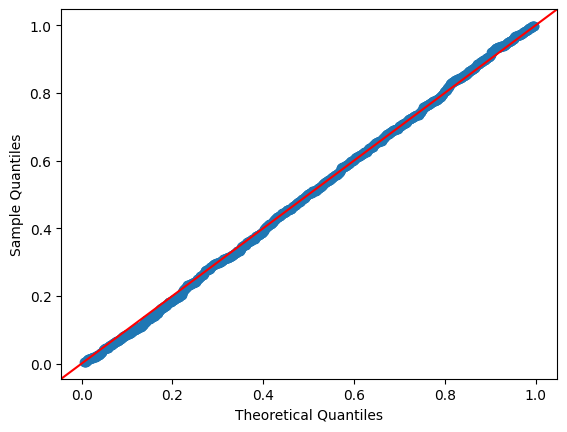

In [26]:
# Plotting QQ plot
sm.qqplot(x, dist=dist, line='45')
plt.show()

# Log-log plot to check if a distribution follows pareto distribution

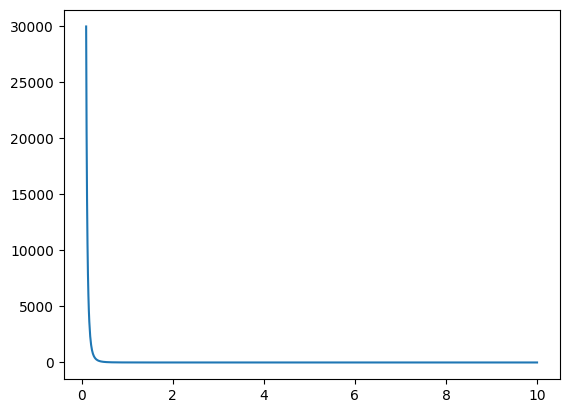

In [27]:
# Define the parameters of the Pareto distribution
alpha = 3
xm = 1

# Create an array of x values
x = np.linspace(0.1, 10, 1000)

# Calculate the y values of the Pareto distribution
y = alpha * (xm**alpha) / (x**(alpha+1))

# Plot the distribution
plt.plot(x,y)

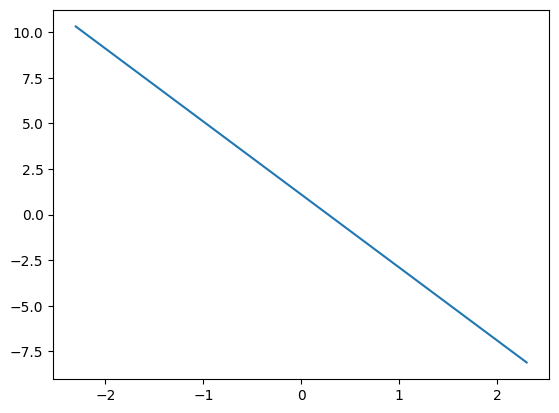

In [28]:
# Creating the log-log plot
plt.plot(np.log(x), np.log(y))